## Overview
XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

### Project delivery:
We have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

### Data Set:

We have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.
Below are the list of datasets which are provided for the analysis:

**Cab_Data.csv** – this file includes details of transaction for 2 cab companies

**Customer_ID.csv** – this is a mapping table that contains a unique identifier which links the customer’s demographic details

**Transaction_ID.csv** – this is a mapping table that contains transaction to customer mapping and payment mode

**City.csv** – this file contains list of US cities, their population and number of cab users

**Import necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
cab=pd.read_csv("Cab_Data.csv")

In [3]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
cab.shape

(359392, 7)

In [5]:
cab.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [6]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


## Data cleansing

### Dealing with missing values

In [7]:
cab.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

#### There are no missing values

### Creating profit column 

In [8]:
cab['profit']=cab['Price Charged']-cab['Cost of Trip']

In [9]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


### Analysing other files

In [10]:
customer=pd.read_csv("Customer_ID.csv")

In [11]:
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [12]:
customer.shape

(49171, 4)

In [13]:
customer.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [14]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [15]:
customer.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [16]:
transaction=pd.read_csv('Transaction_ID.csv')

In [17]:
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [18]:
transaction.shape

(440098, 3)

In [19]:
transaction.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


In [20]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [21]:
transaction.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [22]:
city=pd.read_csv('City.csv')

In [23]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [24]:
city.shape

(20, 3)

In [25]:
city.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

### Merging all four files according to their references.

In [26]:
df=cab.merge(transaction,on='Transaction ID')

In [27]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,27182,Card


In [28]:
df=df.merge(customer,on='Customer ID')

In [29]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,29290,Card,Male,28,10813
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,29290,Cash,Male,28,10813
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,29290,Card,Male,28,10813
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,27703,Card,Male,27,9237
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,27703,Card,Male,27,9237


In [30]:
df=df.merge(city,on='City')

In [31]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,27703,Card,Male,27,9237,"814,885","24,701"


### Date of Travel is in "Epoch" format , we need to convert this into "d/m/y" format

In [32]:
from datetime import datetime,timedelta

In [33]:
datetime.strftime(datetime(1899, 12, 30) + timedelta(days=43465), '%d/%m/%y')

'31/12/18'

In [34]:
df['Date'] =df['Date of Travel'].apply(lambda x: datetime.strftime(datetime(1899, 12, 30) + timedelta(days=x), '%d/%m/%y'))

In [35]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Date
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,29290,Card,Male,28,10813,"814,885","24,701",08/01/16
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,29290,Cash,Male,28,10813,"814,885","24,701",21/07/18
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,29290,Card,Male,28,10813,"814,885","24,701",23/11/18
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,27703,Card,Male,27,9237,"814,885","24,701",06/01/16
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,27703,Card,Male,27,9237,"814,885","24,701",21/04/18


### Droping unnecessary features

In [36]:
df=df.drop(['Date of Travel','Price Charged','Cost of Trip','Transaction ID','Customer ID','Payment_Mode'],axis=1)

In [37]:
df.head()

,Company,City,KM Travelled,profit,Gender,Age,Income (USD/Month),Population,Users,Date
0,Pink Cab,ATLANTA GA,30.45,57.3150,Male,28,10813,"814,885","24,701",08/01/16
1,Yellow Cab,ATLANTA GA,26.19,281.2772,Male,28,10813,"814,885","24,701",21/07/18
2,Yellow Cab,ATLANTA GA,42.55,194.6480,Male,28,10813,"814,885","24,701",23/11/18
3,Pink Cab,ATLANTA GA,28.62,23.6660,Male,27,9237,"814,885","24,701",06/01/16
4,Yellow Cab,ATLANTA GA,36.38,253.9808,Male,27,9237,"814,885","24,701",21/04/18


### Hypothesis testing using t-test

In [38]:
pink=df.loc[(df['Company']=='Pink Cab') & df['profit']]['profit']

In [39]:
pink

0          57.315
3          23.666
6          25.096
7          27.568
11         25.798
           ...   
359332    129.096
359346     11.334
359356    131.000
359358      6.438
359363     19.620
Name: profit, Length: 84709, dtype: float64

In [40]:
yellow=df.loc[(df['Company']=='Yellow Cab') & df['profit']]['profit']

In [41]:
yellow

1         281.2772
2         194.6480
4         253.9808
5          50.8912
8         210.0920
            ...   
359387    143.6180
359388     23.0464
359389     -5.8540
359390     -6.0900
359391     25.7948
Name: profit, Length: 274679, dtype: float64

In [42]:
def compare_2_groups(arr_1, arr_2, alpha, sample_size):
    stat, p = ttest_ind(arr_1, arr_2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Mean profit is same (fail to reject H0)')
    else:
        print('Mean profit is different (reject H0)')

In [43]:
sample_size = 30
pink_sampled = np.random.choice(pink, sample_size)
yellow_sampled = np.random.choice(yellow, sample_size)
compare_2_groups(pink_sampled, yellow_sampled, 0.05, sample_size)

Statistics=-2.310, p=0.024
Mean profit is different (reject H0)


### From the hypothesis testing, we can conclude that there is a significant difference in the mean of profit between yellow and pink cab companies.

## Exploratory Data Analysis

#### Lets find out which company has a higher average profit value.

In [44]:
df.groupby('Company')['profit'].mean()

Company
Pink Cab       62.652174
Yellow Cab    160.259986
Name: profit, dtype: float64

<AxesSubplot:xlabel='Company'>

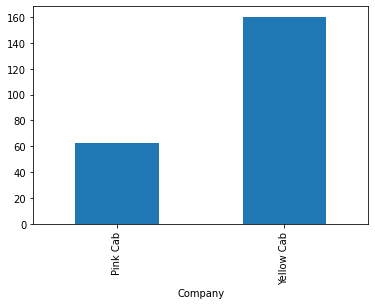

In [45]:
df.groupby('Company')['profit'].mean().plot(kind='bar')

**Clearly "Yellow Cab" has more average profit value**

In [46]:
city_profit=df.groupby(['Company','City']).agg({'profit':'mean'})

In [47]:
city_profit

profit
Company    City                      
Pink Cab   ATLANTA GA       54.511961
           AUSTIN TX        78.932168
           BOSTON MA        50.520960
           CHICAGO IL       34.047910
           DALLAS TX        17.920371
           DENVER CO        29.114016
           LOS ANGELES CA   56.669120
           MIAMI FL         81.069526
           NASHVILLE TN     34.918269
           NEW YORK NY     108.217540
           ORANGE COUNTY    67.412976
           PHOENIX AZ       41.199530
           PITTSBURGH PA    25.084660
           SACRAMENTO CA    41.472273
           SAN DIEGO CA     59.772280
           SEATTLE WA       41.281601
           SILICON VALLEY   89.610358
           TUCSON AZ        74.204725
           WASHINGTON DC    52.482761
Yellow Cab ATLANTA GA      128.797723
           AUSTIN TX       125.249582
           BOSTON MA        61.483619
           CHICAGO IL       64.924486
           DALLAS TX       195.849415
           DENVER CO       146.853175
           LOS ANGELES CA  116.656368
           MIAMI FL        133.872429
           NASHVILLE TN     72.923597
           NEW YORK NY     307.864252
           ORANGE COUNTY   143.785355
           PHOENIX AZ      131.120407
           PITTSBURGH PA   107.857716
           SACRAMENTO CA    60.021471
           SAN DIEGO CA     96.706775
           SEATTLE WA       93.428968
           SILICON VALLEY  206.788383
           TUCSON AZ        71.529258
           WASHINGTON DC    82.384912

In [48]:
city_profit['profit'].groupby('Company', group_keys=False).nlargest(20)

Company     City          
Pink Cab    NEW YORK NY       108.217540
            SILICON VALLEY     89.610358
            MIAMI FL           81.069526
            AUSTIN TX          78.932168
            TUCSON AZ          74.204725
            ORANGE COUNTY      67.412976
            SAN DIEGO CA       59.772280
            LOS ANGELES CA     56.669120
            ATLANTA GA         54.511961
            WASHINGTON DC      52.482761
            BOSTON MA          50.520960
            SACRAMENTO CA      41.472273
            SEATTLE WA         41.281601
            PHOENIX AZ         41.199530
            NASHVILLE TN       34.918269
            CHICAGO IL         34.047910
            DENVER CO          29.114016
            PITTSBURGH PA      25.084660
            DALLAS TX          17.920371
Yellow Cab  NEW YORK NY       307.864252
            SILICON VALLEY    206.788383
            DALLAS TX         195.849415
            DENVER CO         146.853175
            ORANGE COUNTY     

### Both the companies in NEWYORK city records highest profit, while 'Yellow cab' outnumbered 'Pink cab' in all cities interms of average profit.

In [49]:
np.dtype(df['Date'])

dtype('O')

In [50]:
df['Date']=pd.to_datetime(df['Date'])

In [51]:
df.groupby([df['Date'].dt.year,'Company'])['profit'].mean()

Date  Company   
2016  Pink Cab       68.321819
      Yellow Cab    169.347821
2017  Pink Cab       67.070839
      Yellow Cab    168.817057
2018  Pink Cab       53.229689
      Yellow Cab    143.416122
Name: profit, dtype: float64

<AxesSubplot:xlabel='Date,Company'>

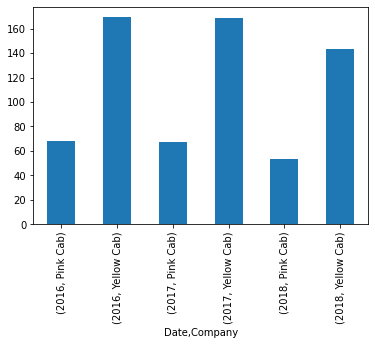

In [52]:
df.groupby([df['Date'].dt.year,'Company'])['profit'].mean().plot(kind='bar')

### Yellow cab has more average profit value across all three years compared to Pink cab

In [53]:
Seasons=['Winter','Winter','Spring','Spring','Spring','Summer','Summer','Summer','Autumn','Autumn','Autumn','Winter']

In [54]:
month_season=dict(zip(range(1,13),Seasons))

In [56]:
df['Season']=df['Date'].dt.month.map(month_season)

In [57]:
df.head()

,Company,City,KM Travelled,profit,Gender,Age,Income (USD/Month),Population,Users,Date,Season
0,Pink Cab,ATLANTA GA,30.45,57.3150,Male,28,10813,"814,885","24,701",2016-08-01,Summer
1,Yellow Cab,ATLANTA GA,26.19,281.2772,Male,28,10813,"814,885","24,701",2018-07-21,Summer
2,Yellow Cab,ATLANTA GA,42.55,194.6480,Male,28,10813,"814,885","24,701",2018-11-23,Autumn
3,Pink Cab,ATLANTA GA,28.62,23.6660,Male,27,9237,"814,885","24,701",2016-06-01,Summer
4,Yellow Cab,ATLANTA GA,36.38,253.9808,Male,27,9237,"814,885","24,701",2018-04-21,Spring


In [58]:
df.groupby(['Company','Season'])['profit'].mean()

Company     Season
Pink Cab    Autumn     64.488344
            Spring     58.406219
            Summer     53.734164
            Winter     73.794345
Yellow Cab  Autumn    148.954286
            Spring    177.684327
            Summer    152.465434
            Winter    166.156693
Name: profit, dtype: float64

<AxesSubplot:xlabel='Company,Season'>

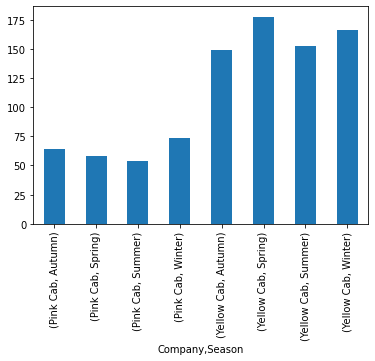

In [59]:
df.groupby(['Company','Season'])['profit'].mean().plot(kind='bar')

### There is no considerable change in average profit in all seasons for both Yellow and Pink cabs, Yellow cab having high profit values.

# Recommendations

**From the above analysis it is very clear that "YELLOW CAB" outperformed "PINK CAB" in almost every aspects, and it is strongly recommended to XYZ company to invest on "YELLOW CAB".**